In [38]:
import scipy as sp
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import signal as signal
from scipy import ndimage as ndimage
from numpy import random as random
import Queue
%matplotlib inline

In [32]:
def generateRandomFloor(xDim, yDim):
    minPile = 5
    maxPile = 10
    floor = np.zeros([xDim, yDim])
    for i in range(0, 4):
        x = random.random_integers(xDim)
        sizeX = random.random_integers(minPile, maxPile)
        y = random.random_integers(yDim)
        sizeY = random.random_integers(minPile, maxPile)
        
        startX = max(0, x-sizeX)
        endX = min(xDim-1, x+sizeX)
        
        startY = max(0, y-sizeY)
        endY = min(yDim-1, y+sizeY)
        
        floor[startX:endX+1, startY:endY+1] = 1
        
    return floor

In [ ]:
def pathPlanner(floor, start, end):
    [xDim yDim] = np.size(floor)
    path = np.zeros([xDim yDim])
    done = false
    while !done:
        soFar = np.zeros([xDim yDim])
        
        setDirection(end, soFar, cost)

In [134]:
"""Lifted directly from: https://teacode.wordpress.com/2013/08/02/algo-week-5-heap-and-dijkstras-shortest-path/"""
import heapq

class PriorityQueue(object):
    """Priority queue based on heap, capable of inserting a new node with
    desired priority, updating the priority of an existing node and deleting
    an abitrary node while keeping invariant"""
 
    def __init__(self, heap=[]):
        """if 'heap' is not empty, make sure it's heapified"""
 
        heapq.heapify(heap)
        self.heap = heap
        self.entry_finder = dict({i[-1]: i for i in heap})
        self.REMOVED = '<remove_marker>'
 
    def insert(self, nodeIn, priority=0):
        """'entry_finder' bookkeeps all valid entries, which are bonded in
        'heap'. Changing an entry in either leads to changes in both."""
        node = self.ptToString(nodeIn)
        if node in self.entry_finder:
            self.delete(node)
        entry = [priority, node]
        self.entry_finder[node] = entry
        heapq.heappush(self.heap, entry)
 
    def delete(self, node):
        """Instead of breaking invariant by direct removal of an entry, mark
        the entry as "REMOVED" in 'heap' and remove it from 'entry_finder'.
        Logic in 'pop()' properly takes care of the deleted nodes."""
 
        entry = self.entry_finder.pop(node)
        entry[-1] = self.REMOVED
        return entry[0]
 
    def pop(self):
        """Any popped node marked by "REMOVED" does not return, the deleted
        nodes might be popped or still in heap, either case is fine."""
 
        while self.heap:
            priority, node = heapq.heappop(self.heap)
            if node is not self.REMOVED:
                del self.entry_finder[node]
                return priority, self.stringToPt(node)
        raise KeyError('pop from an empty priority queue')
        
    def ptToString(self, pt):
        return str(pt[0]) + "," + str(pt[1])
    
    def stringToPt(self, inStr):
        return [int(x.strip()) for x in inStr.split(',')]

**TO DO**
It might be a good idea to minimize turns, and generate paths which are less jagged. This can be done quite simply by modifying the getLength() function to also take in the coordinate previous to u, and having neighbors in the same direction weighted less than neighbors which would require turning. 

In [135]:
def Dijkstra(graph, source):
    [X, Y] = graph.shape
    dist = np.zeros(graph.shape)
    prev = np.zeros([X, Y, 2])
    dist[source[0], source[1]] = 0                                  

    Q = PriorityQueue()
    numPtsLeft = X*Y;
    
    for x in range(0, X):
        for y in range(0, Y):
            v = [x, y]
            if x != source[0] or y != source[1]:
                dist[x, y] = float('Inf')
                prev[x, y, :] = [-1, -1]
            else:
                dist[x, y] = 0
                prev[x, y, :] = [0, 0]
            Q.insert(v, priority=dist[x, y])
            
    while numPtsLeft > 0:
        [priority, u] = Q.pop()
        numPtsLeft -= 1
        neighbors = getNeighbors(u, X, Y)
        for idx in neighbors:
            v = neighbors[idx]
            newDist = dist[u[0], u[1]] + getLength(u, v, graph)
            if newDist < dist[v[0], v[1]]:
                dist[v[0], v[1]] = newDist
                prev[v[0], v[1], :] = u
                Q.insert(v, priority=newDist)
                
    return dist, prev

def getNeighbors(pt, X, Y):
    neighbors = {}
    x = pt[0]
    y = pt[1]
    
    i = 0
    if x > 0:
        neighbors[i] = [x-1, y]
        i+=1
    if x < X-1:
        neighbors[i] = [x+1, y]
        i+=1
    if y > 0:
        neighbors[i] = [x, y-1]
        i+=1
    if y < Y-1:
        neighbors[i] = [x, y+1]
    return neighbors

def getLength(u, v, graph):
    length = 1
    if graph[v[0], v[1]] == 1:
        length = 1000
    return length

In [136]:
def showPath(floor, prev, source, dest):
    curr= dest
    currX = dest[0]
    currY = dest[1]
    
    srcX = source[0]
    srcY = source[1]
    while currX != srcX or currY != srcY:
        floor[currX, currY] = 0.5
        curr = prev[currX, currY, :]
        currX = curr[0]
        currY = curr[1]
    plt.figure()
    plt.imshow(floor.astype(float), interpolation='nearest')
    plt.show()

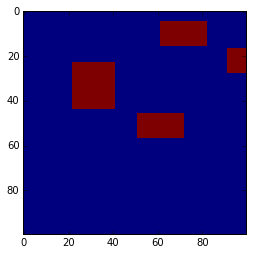

Path to: (89,98)


C:\Users\Mohini\Anaconda\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Mohini\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


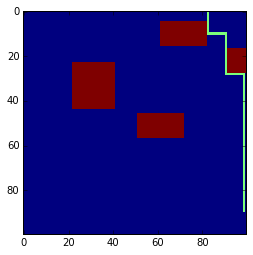

In [144]:
xDim = 100
yDim = 100
floor = generateRandomFloor(xDim, yDim)
dest = [random.random_integers(xDim-1), random.random_integers(yDim-1)]

plt.figure()
plt.imshow(floor.astype(float), interpolation='nearest')
plt.show()

dist, prev = Dijkstra(floor, [0, 0])

src = [0, 0]
print 'Path to: (' + str(dest[0]) + ',' + str(dest[1]) + ')'
showPath(floor, prev, src, dest)